In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data=pd.read_csv('C:\\Users\\91735\\Downloads\\Telco-Customer-Churn.xlsx - Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# compare churn count wrt gender

Text(0.5, 1.0, 'churn count wrt gender')

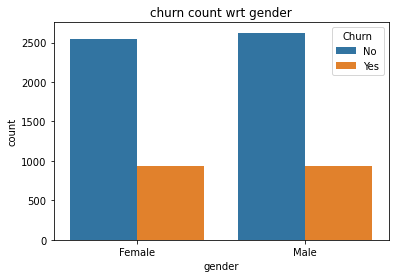

In [3]:
sns.countplot(data=data,x='gender',hue='Churn')
plt.title('churn count wrt gender')

# Find out how many female senior citizens there in the dataset

Category_seniorcitizen
Female Senior citizen     568
Male Senior citizen       574
Other females            2920
Other males              2981
dtype: int64


<AxesSubplot:title={'center':'Age & Gender based count'}>

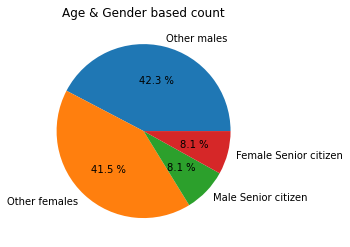

In [6]:
import numpy as np
data1=data.copy()
conditions=[(data1['SeniorCitizen']==0) & (data1['gender']=='Male'),
           (data1['SeniorCitizen']==0) & (data1['gender']=='Female'),
           (data1['SeniorCitizen']==1) & (data1['gender']=='Male'),
           (data1['SeniorCitizen']==1) & (data1['gender']=='Female')]
values=['Other males','Other females','Male Senior citizen','Female Senior citizen']
data1['Category_seniorcitizen']=np.select(conditions, values) ## creates a new category based on gender and senior citizenship

print(data1.groupby('Category_seniorcitizen').size()) ## gives the count per category
data1['Category_seniorcitizen'].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=False, title='Age & Gender based count')

# Compare 'tenure' with 'Total Charges'

[Text(0.5, 1.0, 'Total charges vs Tenure')]

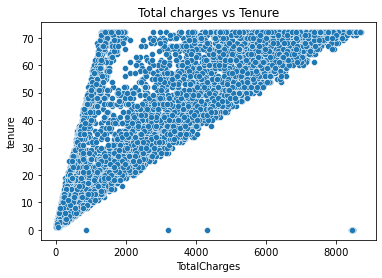

In [16]:
sns.scatterplot(data=data1, x="TotalCharges",y="tenure").set(title='Total charges vs Tenure')

# Find out which contract is preferred by the senior citizen

[Text(0.5, 1.0, 'Senior citizens contract preference')]

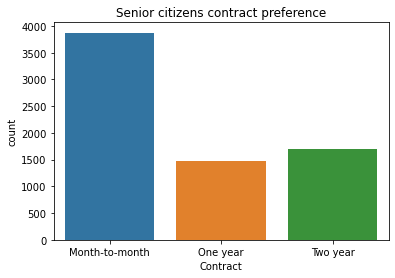

In [23]:
scn=data.copy()
scn.loc[sen_cit['SeniorCitizen']==0]
sns.countplot(x='Contract', data=sen_cit).set(title='Senior citizens contract preference')

# Comment on your finds on Payment Method

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

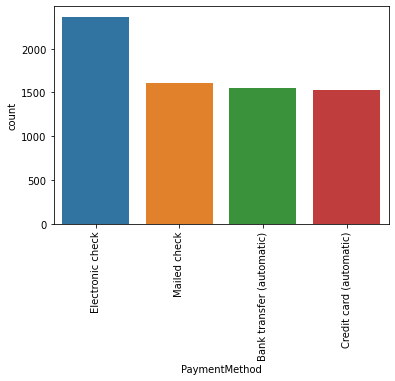

In [27]:
sns.countplot(data['PaymentMethod'])
plt.xticks(rotation=90)

In [ ]:
#finding 1:based on the gragh we can say that electronic check is commomnly used

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

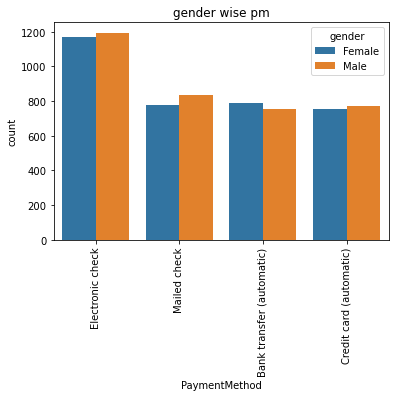

In [26]:
sns.countplot(data=data,x='PaymentMethod',hue='gender')
plt.title('gender wise pm')
plt.xticks(rotation=90)

In [28]:
#finding 2:In all payment methods male exceed female except in bank transfer